# EDA

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/fifa-23-complete-player-dataset/male_players (legacy).csv',
                      low_memory=False)


In [3]:
# Filter the dataset for FIFA version 23

fifa_2023_df = df[df['fifa_version'] == 23].copy()

# Display the shape and first few rows of the filtered dataset
print("Filtered Dataset for FIFA 23:")
print(f"Shape: {fifa_2023_df.shape}")
print(fifa_2023_df.head())

# Save the filtered dataset to a new CSV file
fifa_2023_df.to_csv('fifa_2023_players.csv', index=False)

print("FIFA 23 dataset saved as 'fifa_2023_players.csv'")

Filtered Dataset for FIFA 23:
Shape: (18533, 110)
        player_id                                player_url  fifa_version  \
143050     158023        /player/158023/lionel-messi/230002            23   
143051     165153       /player/165153/karim-benzema/230002            23   
143052     188545  /player/188545/robert-lewandowski/230002            23   
143053     192985     /player/192985/kevin-de-bruyne/230002            23   
143054     231747       /player/231747/kylian-mbappe/230002            23   

        fifa_update fifa_update_date      short_name  \
143050            2       2022-09-26        L. Messi   
143051            2       2022-09-26      K. Benzema   
143052            2       2022-09-26  R. Lewandowski   
143053            2       2022-09-26    K. De Bruyne   
143054            2       2022-09-26       K. Mbappé   

                             long_name player_positions  overall  potential  \
143050  Lionel Andrés Messi Cuccittini               RW       91       

In [4]:
# Display dataset overview
print("Dataset Overview:")
print(f"Shape of the dataset: {fifa_2023_df.shape}")


Dataset Overview:
Shape of the dataset: (18533, 110)


In [5]:
print("\nFirst 5 rows of the dataset:")
fifa_2023_df.head()


First 5 rows of the dataset:


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
143050,158023,/player/158023/lionel-messi/230002,23,2,2022-09-26,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,...,63+3,63+3,64+3,59+3,50+3,50+3,50+3,59+3,19+3,https://cdn.sofifa.net/players/158/023/23_120.png
143051,165153,/player/165153/karim-benzema/230002,23,2,2022-09-26,K. Benzema,Karim Benzema,"CF, ST",91,91,...,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,https://cdn.sofifa.net/players/165/153/23_120.png
143052,188545,/player/188545/robert-lewandowski/230002,23,2,2022-09-26,R. Lewandowski,Robert Lewandowski,ST,91,91,...,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/23_120.png
143053,192985,/player/192985/kevin-de-bruyne/230002,23,2,2022-09-26,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,79+3,79+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/23_120.png
143054,231747,/player/231747/kylian-mbappe/230002,23,2,2022-09-26,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png


In [6]:
print("\nColumn Names:")
fifa_2023_df.columns



Column Names:


Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)

In [7]:
print("\nDataset Info:")
fifa_2023_df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 18533 entries, 143050 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 15.7+ MB


In [8]:
# Summary of numerical and categorical data
print("\nSummary of Numerical Features:")
fifa_2023_df.describe()




Summary of Numerical Features:


,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18533.000000,18533.0,18533.0,18533.000000,18533.000000,1.844400e+04,18455.000000,18533.000000,18533.000000,18533.000000,...,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000,2066.000000
mean,236754.164949,23.0,2.0,65.815572,70.966330,2.849150e+06,8827.946356,25.268494,181.553283,75.179518,...,58.015324,46.695030,48.333999,46.202773,16.419252,16.175687,16.074246,16.224303,16.491987,36.037754
std,26850.656280,0.0,0.0,6.813120,6.172536,7.597106e+06,19469.553585,4.736062,6.859827,7.013376,...,12.053915,20.335292,21.172511,20.682117,17.607084,16.937736,16.693560,17.112458,17.946656,10.645352
min,1179.000000,23.0,2.0,46.000000,48.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,...,13.000000,3.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,220940.000000,23.0,2.0,62.000000,67.000000,5.000000e+05,1000.000000,21.000000,177.000000,70.000000,...,51.000000,29.000000,28.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,240987.000000,23.0,2.0,66.000000,71.000000,1.000000e+06,3000.000000,25.000000,182.000000,75.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,35.000000
75%,258976.000000,23.0,2.0,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,44.000000
max,271817.000000,23.0,2.0,91.000000,95.000000,1.905000e+08,450000.000000,44.000000,206.000000,105.000000,...,96.000000,92.000000,93.000000,90.000000,90.000000,90.000000,93.000000,91.000000,90.000000,65.000000


In [9]:
print("\nSummary of Categorical Features:")
fifa_2023_df.describe(include=['object'])



Summary of Categorical Features:


,player_url,fifa_update_date,short_name,long_name,player_positions,dob,league_name,club_name,club_position,club_loaned_from,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
count,18533,18533,18533,18533,18533,18533,18455,18455,18455,1238,...,18533,18533,18533,18533,18533,18533,18533,18533,18533,18533
unique,18533,1,17636,18509,696,6235,41,673,29,325,...,234,234,202,187,244,244,244,187,116,18533
top,/player/271608/aqeel-al-dhafeeri/230002,2022-09-26,A. Rodríguez,Yusuf Erdoğan,CB,1992-02-29,Super League,Everton,SUB,Atalanta,...,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,16+2,https://cdn.sofifa.net/players/271/608/23_120.png
freq,1,18533,7,2,2422,102,1148,57,8032,20,...,662,662,750,761,564,564,564,761,3731,1


In [10]:
# Check for missing values
missing_values = fifa_2023_df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])




Missing Values:
value_eur                            89
wage_eur                             78
league_id                            78
league_name                          78
league_level                         78
club_team_id                         78
club_name                            78
club_position                        78
club_jersey_number                   78
club_loaned_from                  17295
club_joined_date                   1316
club_contract_valid_until_year       78
nation_team_id                    17728
nation_position                   17728
nation_jersey_number              17728
release_clause_eur                 1327
player_tags                       17226
player_traits                      8910
pace                               2066
shooting                           2066
passing                            2066
dribbling                          2066
defending                          2066
physic                             2066
goalkeeping_speed      

In [11]:
# Calculate the percentage of missing values
missing_percentage = (fifa_2023_df.isnull().sum() / len(fifa_2023_df)) * 100

# Filter only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Display the percentage of missing values
print("\nPercentage of Missing Values:")
print(missing_percentage)



Percentage of Missing Values:
nation_team_id                    95.656397
nation_position                   95.656397
nation_jersey_number              95.656397
club_loaned_from                  93.320024
player_tags                       92.947715
goalkeeping_speed                 88.852317
player_traits                     48.076404
shooting                          11.147683
passing                           11.147683
physic                            11.147683
dribbling                         11.147683
defending                         11.147683
pace                              11.147683
release_clause_eur                 7.160201
club_joined_date                   7.100847
value_eur                          0.480224
wage_eur                           0.420871
club_jersey_number                 0.420871
club_position                      0.420871
club_name                          0.420871
club_team_id                       0.420871
league_level                       0.420871
l

In [12]:

print([col for col in fifa_2023_df.columns if 'height' in col.lower() or 'weight' in col.lower()])


['height_cm', 'weight_kg']


In [13]:
numerical_features = ['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
print([feature for feature in numerical_features if feature not in fifa_2023_df.columns])  # Should return an empty list if all columns are valid


[]


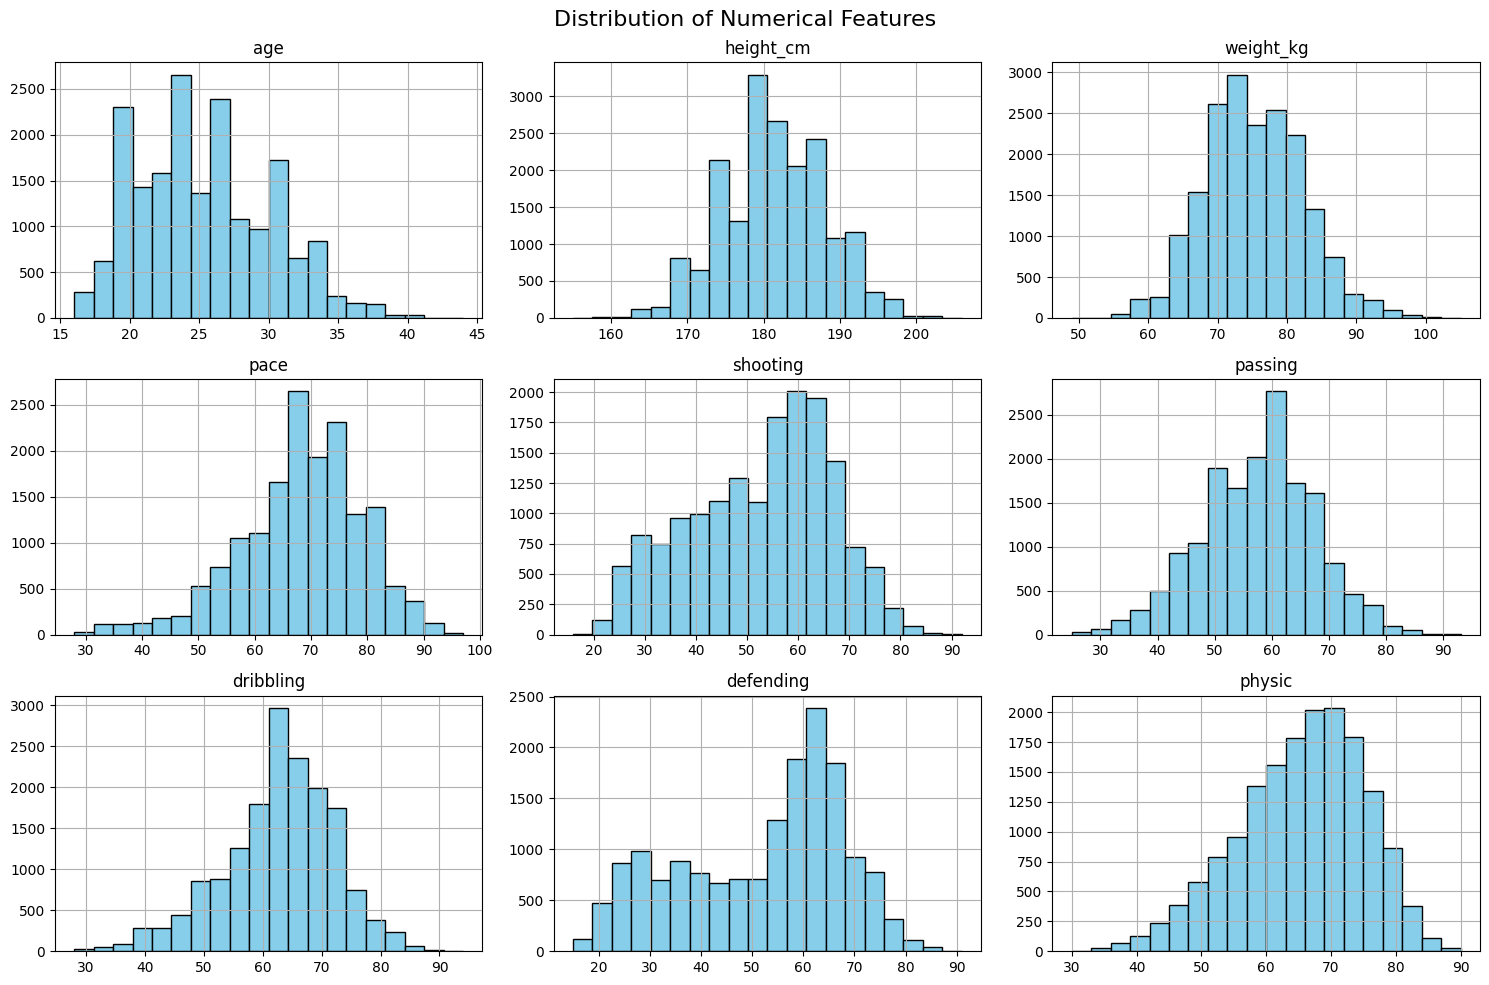

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for numerical attributes
fifa_2023_df[numerical_features].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


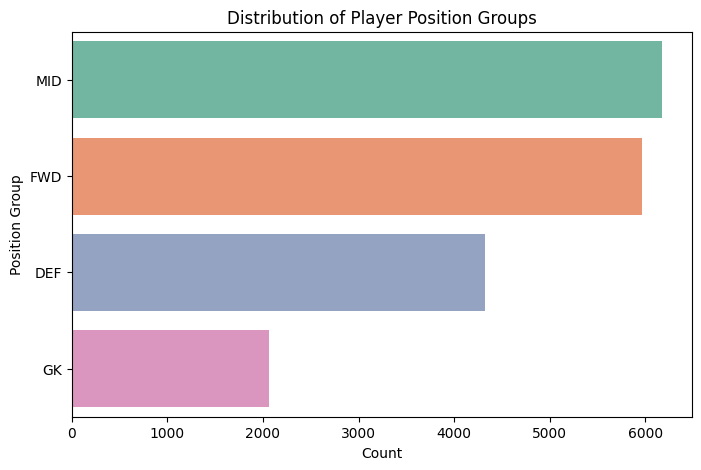

In [15]:

# Define position groups
position_groups = {
    'FWD': ['ST', 'LW', 'RW', 'CF'],
    'MID': ['CM', 'CAM', 'CDM', 'LM', 'RM'],
    'DEF': ['CB', 'LB', 'RB', 'LWB', 'RWB'],
    'GK': ['GK']
}

# Map detailed positions to groups
fifa_2023_df['position_group'] = fifa_2023_df['player_positions'].apply(
    lambda pos: next((key for key, values in position_groups.items() 
                      if any(p in pos for p in values)), 'Other')
)

# Plot grouped positions
plt.figure(figsize=(8, 5))
sns.countplot(y=fifa_2023_df['position_group'], 
              order=fifa_2023_df['position_group'].value_counts().index, 
              palette='Set2')
plt.title('Distribution of Player Position Groups')
plt.xlabel('Count')
plt.ylabel('Position Group')
plt.show()


In [16]:
# Assuming 'player_positions' is the column used as the label
unique_labels = fifa_2023_df['player_positions'].unique()



# Optional: Count the number of unique values
print(f"\nTotal unique labels: {len(unique_labels)}")



Total unique labels: 696


Distribution of Player Positions:
CM     4184
CB     3922
ST     3229
CDM    2842
LM     2268
RM     2257
CAM    2186
GK     2066
RB     1914
LB     1842
LW     1169
RW     1161
LWB     693
RWB     679
CF      421
Name: count, dtype: int64

Dataset Balance Analysis:
Most Frequent Position: CM - 4184 players
Least Frequent Position: CF - 421 players
Total Unique Positions: 15


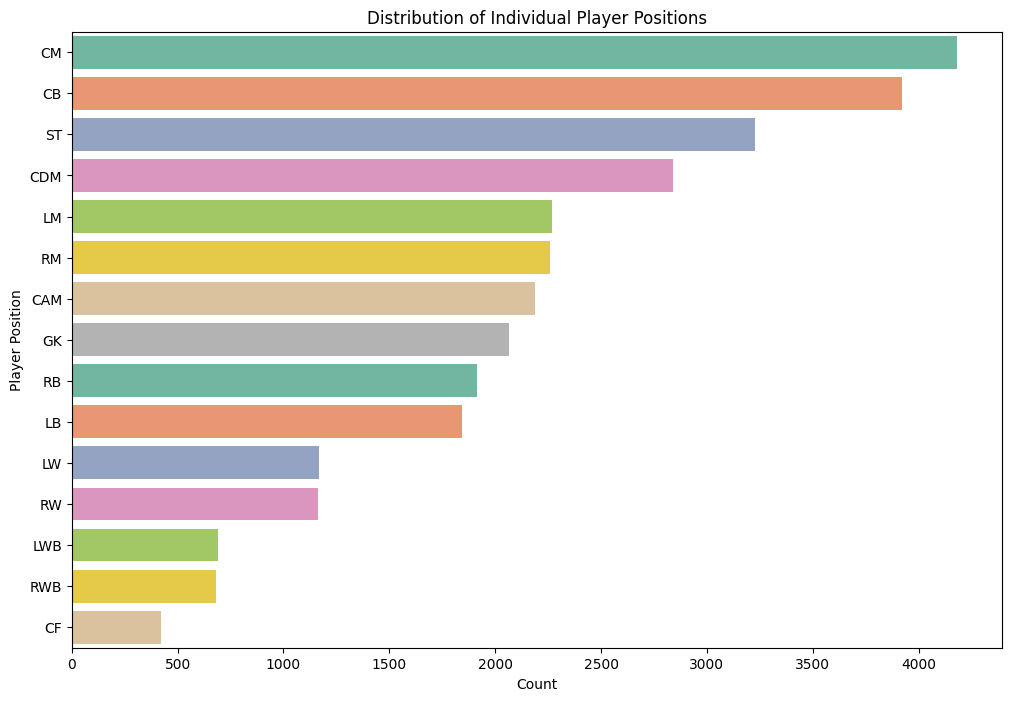

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Split the 'player_positions' column into individual positions
fifa_2023_df['individual_positions'] = fifa_2023_df['player_positions'].apply(lambda x: x.split(', '))

# Flatten the list of positions
individual_positions_flat = [pos for sublist in fifa_2023_df['individual_positions'] for pos in sublist]

# Calculate and print the value counts of individual positions
position_counts = pd.Series(individual_positions_flat).value_counts()
print("Distribution of Player Positions:")
print(position_counts)

# Check if the dataset is balanced
print("\nDataset Balance Analysis:")
print(f"Most Frequent Position: {position_counts.idxmax()} - {position_counts.max()} players")
print(f"Least Frequent Position: {position_counts.idxmin()} - {position_counts.min()} players")
print(f"Total Unique Positions: {len(position_counts)}")

# Plot the distribution of each individual position
plt.figure(figsize=(12, 8))
sns.countplot(
    y=individual_positions_flat,
    order=position_counts.index,
    palette='Set2'
)
plt.title('Distribution of Individual Player Positions')
plt.xlabel('Count')
plt.ylabel('Player Position')
plt.show()


# preprocessing


In [18]:
# Check for columns with unhashable types like lists or objects
for col in fifa_2023_df.columns:
    if fifa_2023_df[col].apply(type).eq(list).any():
        print(f"Column '{col}' contains unhashable list-like objects.")


Column 'individual_positions' contains unhashable list-like objects.


In [19]:
# Convert 'individual_positions' list-like objects to strings
fifa_2023_df['individual_positions'] = fifa_2023_df['individual_positions'].apply(lambda x: str(x) if isinstance(x, list) else x)


In [20]:
# Check for duplicates in the dataset
duplicate_rows = fifa_2023_df[fifa_2023_df.duplicated()]

# Display the duplicate rows (if any)
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [21]:
#a. Drop Columns with Excessive Missing Values or Irrelevant Information
columns_to_drop = [
    'player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 
    'short_name', 'long_name', 'nation_team_id', 'nation_position', 
    'nation_jersey_number', 'club_loaned_from', 'player_tags', 'value_eur', 
    'wage_eur', 'dob', 'league_id', 'league_name', 'league_level', 
    'club_team_id', 'club_name', 'club_jersey_number', 'club_joined_date', 
    'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 
    'nation_team_id', 'nation_jersey_number', 'real_face', 'release_clause_eur', 
    'player_face_url', 'club_position'
]


In [22]:
# Drop columns
fifa_2023_df = fifa_2023_df.drop(columns=columns_to_drop, axis=1)

# Verify the remaining columns
print("Remaining Columns:")
print(fifa_2023_df.columns)
print("Columns dropped successfully!")

Remaining Columns:
Index(['player_positions', 'overall', 'potential', 'age', 'height_cm',
       'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'player_traits',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_stand

3. Handle Missing Values for Other Columns
For columns with a more moderate amount of missing data (such as the attributes like shooting, passing, goalkeeping_speed, etc.), you have a few options:



GOALKEEPING SPEEED  Special case

In [23]:
# Impute missing values in the 'goalkeeping_speed' column with 0 for outfield players
fifa_2023_df['goalkeeping_speed'] = fifa_2023_df['goalkeeping_speed'].fillna(0)

# Check for remaining missing values
missing_values = fifa_2023_df.isnull().sum()
print(f"Remaining missing values after imputation:\n{missing_values[missing_values > 0]}")


Remaining missing values after imputation:
player_traits    8910
pace             2066
shooting         2066
passing          2066
dribbling        2066
defending        2066
physic           2066
dtype: int64



a. For Numerical Columns with Missing Values
Imputation: One option is to fill in the missing values with the mean or median of the column. This is a common approach for numerical features when missing values are relatively low.

In [24]:
from sklearn.impute import SimpleImputer

# Impute numerical columns
# Identify all numerical columns in the dataset
numerical_columns = fifa_2023_df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values with the median for all numerical columns
fifa_2023_df[numerical_columns] = fifa_2023_df[numerical_columns].fillna(fifa_2023_df[numerical_columns].median())

# Check for remaining missing values after imputation
missing_values = fifa_2023_df.isnull().sum()
print(f"Remaining missing values after imputation:\n{missing_values[missing_values > 0]}")

Remaining missing values after imputation:
player_traits    8910
dtype: int64


For categorical columns, there are different strategies for handling missing values.  we're usiing The most common method which is :

Impute with the Mode: This replaces missing values with the most frequent (mode) category in the column.

In [25]:
# Identify categorical columns in the dataset
categorical_columns = fifa_2023_df.select_dtypes(include=['object']).columns

# Impute missing values with the mode for all categorical columns
for column in categorical_columns:
    # Ensure we select a single scalar value from the mode
    mode_value = fifa_2023_df[column].mode().iloc[0]  # Get the first mode value (in case of ties)
    fifa_2023_df[column] = fifa_2023_df[column].fillna(mode_value)

# Check for remaining missing values after imputation
missing_values_categorical = fifa_2023_df.isnull().sum()
print(f"Remaining missing values after imputation:\n{missing_values_categorical[missing_values_categorical > 0]}")


Remaining missing values after imputation:
Series([], dtype: int64)


The list in player position issue + the sol 

Distribution of Player Positions:
individual_positions
CB     3272
ST     2501
CM     2209
GK     2066
CDM    1562
RB     1203
LB     1147
CAM    1040
RM      931
LM      914
RW      496
LW      466
RWB     302
LWB     301
CF      123
Name: count, dtype: int64

Dataset Balance Analysis:
Most Frequent Position: CB - 3272 players
Least Frequent Position: CF - 123 players
Total Unique Positions: 15


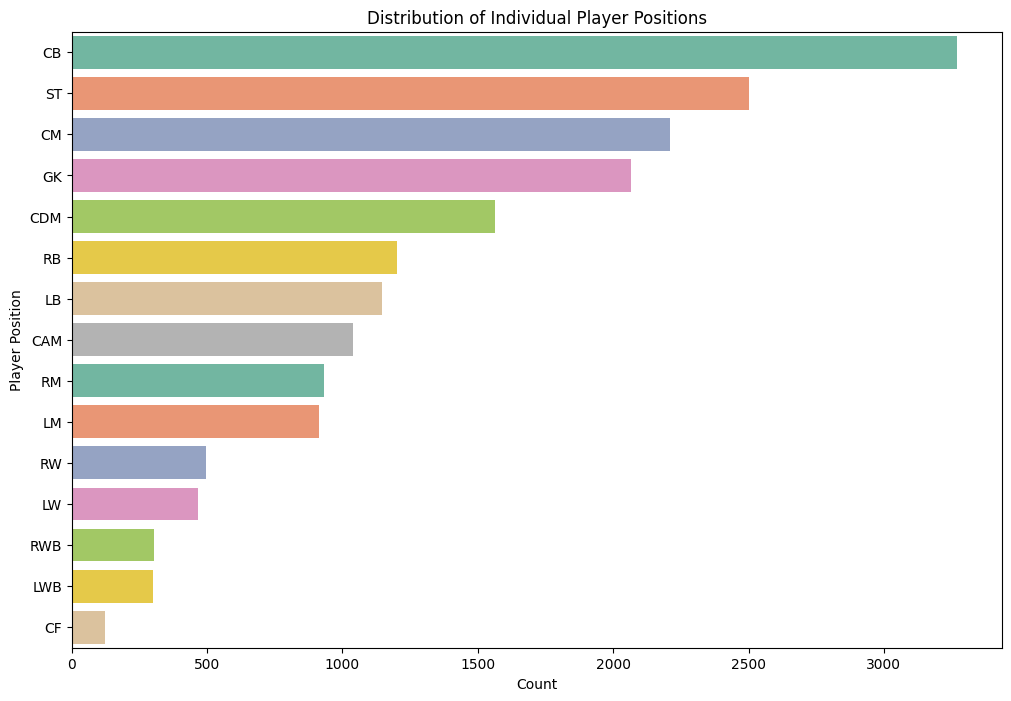

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the first item from the 'individual_positions' list
fifa_2023_df['individual_positions'] = fifa_2023_df['player_positions'].apply(lambda x: x.split(', ')[0] if isinstance(x, str) else x)

# Calculate the value counts of individual positions
position_counts = fifa_2023_df['individual_positions'].value_counts()

# Print the distribution of player positions
print("Distribution of Player Positions:")
print(position_counts)

# Check if the dataset is balanced
print("\nDataset Balance Analysis:")
print(f"Most Frequent Position: {position_counts.idxmax()} - {position_counts.max()} players")
print(f"Least Frequent Position: {position_counts.idxmin()} - {position_counts.min()} players")
print(f"Total Unique Positions: {len(position_counts)}")

# Plot the distribution of each individual position
plt.figure(figsize=(12, 8))
sns.countplot(
    y=fifa_2023_df['individual_positions'],
    order=position_counts.index,
    palette='Set2'
)
plt.title('Distribution of Individual Player Positions')
plt.xlabel('Count')
plt.ylabel('Player Position')
plt.show()


In [27]:
fifa_2023_df = fifa_2023_df.drop(columns=['player_positions'])
  # Dropingoriginal label column after creating another one
print(fifa_2023_df.columns)

Index(['overall', 'potential', 'age', 'height_cm', 'weight_kg',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'player_traits',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle'

In [28]:
# List all categorical features in the dataset
categorical_features = fifa_2023_df.select_dtypes(include=['object']).columns.tolist()
# Print the list of categorical features
print("Categorical features to encode:")
print(categorical_features)

Categorical features to encode:
['preferred_foot', 'work_rate', 'body_type', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'position_group', 'individual_positions']


**> ENCODING PART**



In [29]:
print(fifa_2023_df.shape)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
fifa_2023_df['individual_positions'] = le.fit_transform(fifa_2023_df['individual_positions'])
print(fifa_2023_df.shape)


(18533, 82)
(18533, 82)


In [30]:
# 2. Encode 'preferred_foot' (Label Encoding)
fifa_2023_df['preferred_foot'] = le.fit_transform(fifa_2023_df['preferred_foot'])
print(fifa_2023_df.shape)


(18533, 82)


In [31]:
from category_encoders import BinaryEncoder

binary_encoder = BinaryEncoder()
# Binary encode 'work_rate'
encoded_work_rate = binary_encoder.fit_transform(fifa_2023_df[['work_rate']])  # Use double brackets to ensure a DataFrame

# Rename columns for clarity
encoded_work_rate.columns = [f'work_rate_bin_{i}' for i in range(1, encoded_work_rate.shape[1] + 1)]

# Concatenate the encoded columns back to the original DataFrame
fifa_2023_df = pd.concat([fifa_2023_df, encoded_work_rate], axis=1)

# Drop the original 'work_rate' column if no longer needed
fifa_2023_df.drop(columns=['work_rate'], inplace=True)

print(fifa_2023_df.shape)  # Verify the new shape


(18533, 85)


In [32]:
# 4. Encode 'body_type' (Label Encoding)
# 'body_type' can be Label Encoded if the categories don't have an ordinal relationship.
fifa_2023_df['body_type'] = le.fit_transform(fifa_2023_df['body_type'])
print(fifa_2023_df.shape)


(18533, 85)


In [33]:
# 5. Encode 'player_traits'
# Frequency Encoding for 'player_traits'
player_traits_counts = fifa_2023_df['player_traits'].value_counts().to_dict()
fifa_2023_df['player_traits_encoded'] = fifa_2023_df['player_traits'].map(player_traits_counts)

# Drop the original 'player_traits' column
fifa_2023_df.drop(columns=['player_traits'], inplace=True)
print(fifa_2023_df.shape)


(18533, 85)


In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of positional columns
position_columns = [
     'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

# Apply Label Encoding to each position column
for column in position_columns:
    fifa_2023_df[column] = le.fit_transform(fifa_2023_df[column])

# Check the resulting shape of the DataFrame
print(fifa_2023_df.shape)


(18533, 85)


In [35]:
# 7. Encode 'position_group' (Label Encoding)
# 'position_group' is a categorical feature and Label Encoding is a suitable choice for it.
fifa_2023_df['position_group'] = le.fit_transform(fifa_2023_df['position_group'])
print(fifa_2023_df.shape)


(18533, 85)


In [36]:
# View the first few rows of the DataFrame after encoding
print(fifa_2023_df.head()) 

        overall  potential  age  height_cm  weight_kg  preferred_foot  \
143050       91         91   35        169         67               0   
143051       91         91   34        185         81               1   
143052       91         91   33        185         81               1   
143053       91         91   31        181         70               1   
143054       91         95   23        182         73               1   

        weak_foot  skill_moves  international_reputation  body_type  ...  rcb  \
143050          4            4                         5          9  ...   55   
143051          4            4                         4          4  ...   71   
143052          4            4                         5          9  ...   97   
143053          5            4                         4          9  ...  159   
143054          4            5                         4          9  ...   68   

         rb  gk  position_group  individual_positions  work_rate_bin_1  \


**Splitting data**
before scaling This ensures no data leakage occurs since test data remains unseen during training and preprocessing

In [37]:
from sklearn.model_selection import train_test_split

# Step 1: Separate Features and Target for Supervised and Unsupervised Learning
X = fifa_2023_df.drop(columns=['individual_positions'])  # Features (for both unsupervised and supervised)
y = fifa_2023_df['individual_positions']                # Target variable (for supervised only)

# Step 2: Split Data into Training and Testing Sets for Supervised Learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Supervised Learning Dataset:
supervised_X_train = X_train
supervised_X_test = X_test
supervised_y_train = y_train
supervised_y_test = y_test

# **Unsupervised Learning Dataset**
#For unsupervised learning, we use the entire feature set without the labels
unsupervised_X = X 
unsupervised_Y = y# This is just for the sake of evaluation and comparision


**Scaling**

In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select only the numerical columns for scaling
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

In [39]:
# **Scaling for Supervised Learning Dataset**
# Fit the scaler on the supervised training data and transform both the train and test sets
supervised_X_train[numerical_features] = scaler.fit_transform(supervised_X_train[numerical_features])
supervised_X_test[numerical_features] = scaler.transform(supervised_X_test[numerical_features])


In [40]:
# **Scaling for Unsupervised Learning Dataset**
# Apply scaling to the unsupervised training and testing sets
unsupervised_X[numerical_features] = scaler.fit_transform(unsupervised_X[numerical_features])



In [41]:
# Verify Shapes and Scaled Data for both supervised and unsupervised datasets
print("Supervised Learning Dataset:")
print("Training set size:", supervised_X_train.shape, supervised_y_train.shape)
print("Testing set size:", supervised_X_test.shape, supervised_y_test.shape)
print("Sample of scaled supervised training data:\n", supervised_X_train[numerical_features].head())


Supervised Learning Dataset:
Training set size: (14826, 84) (14826,)
Testing set size: (3707, 84) (3707,)
Sample of scaled supervised training data:
          overall  potential       age  height_cm  weight_kg  preferred_foot  \
160965 -1.890965  -0.807151 -1.538492  -1.243632  -0.738184        0.563277   
155836 -0.418531   0.167359 -0.694174  -0.807344  -0.738184        0.563277   
161235 -2.185452  -1.294405 -1.116333   0.210659   0.117933        0.563277   
160600 -1.743722  -0.482314 -0.905253   0.065230  -0.738184        0.563277   
161244 -2.185452  -1.781660 -0.483094   0.356088   0.117933        0.563277   

        weak_foot  skill_moves  international_reputation  body_type  ...  \
160965  -1.399143    -0.474870                 -0.243025  -1.347751  ...   
155836   0.087327     0.823143                 -0.243025  -1.347751  ...   
161235  -1.399143    -0.474870                 -0.243025   0.286704  ...   
160600   0.087327    -0.474870                 -0.243025  -1.347751  ..

In [42]:

print("\nUnsupervised Learning Dataset:")
print("Training set size:", unsupervised_X.shape)
print("Sample of scaled unsupervised training data:\n", unsupervised_X[numerical_features].head())


Unsupervised Learning Dataset:
Training set size: (18533, 84)
Sample of scaled unsupervised training data:
         overall  potential       age  height_cm  weight_kg  preferred_foot  \
143050  3.69656   3.245701  2.054823  -1.830020  -1.166305       -1.768507   
143051  3.69656   3.245701  1.843671   0.502463   0.829934        0.565449   
143052  3.69656   3.245701  1.632520   0.502463   0.829934        0.565449   
143053  3.69656   3.245701  1.210217  -0.080658  -0.738540        0.565449   
143054  3.69656   3.893751 -0.478996   0.065122  -0.310774        0.565449   

        weak_foot  skill_moves  international_reputation  body_type  ...  \
143050   1.563842     2.118301                 10.838537   3.002266  ...   
143051   1.563842     2.118301                  8.067908   0.284730  ...   
143052   1.563842     2.118301                 10.838537   3.002266  ...   
143053   3.047851     2.118301                  8.067908   3.002266  ...   
143054   1.563842     3.414046            

# **FEATURE SLECTIOOOONNNNNNNN**

First for the Supervised learning algos
**RFE (Recursive Feature Elimination) with an Estimator**

In [43]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier 

# Initialize the model (RandomForest in this case)
model = RandomForestClassifier(random_state=42,class_weight='balanced')


In [44]:
# Initialize RFE with the model and the desired number of features
rfe = RFE(estimator=model, n_features_to_select=20)  # Choose number of features to select


In [45]:
# Fit RFE
X_train_rfe = rfe.fit_transform(X_train, y_train)

In [46]:
# Check which features are selected
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['preferred_foot', 'pace', 'defending', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_volleys', 'skill_dribbling', 'skill_fk_accuracy',
       'skill_long_passing', 'movement_acceleration', 'power_strength',
       'mentality_positioning', 'mentality_vision',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving', 'lw',
       'position_group'],
      dtype='object')


**PCA aka Principle component analysis** as a feature selection/ Reducing dimentiality in the unsupervised Learning 


PCA with 90.0% explained variance:
Number of components: 13
Explained variance ratio: 0.9038958798373772

PCA with 95.0% explained variance:
Number of components: 21
Explained variance ratio: 0.9513470234764423

PCA with 99.0% explained variance:
Number of components: 40
Explained variance ratio: 0.9907874979125797


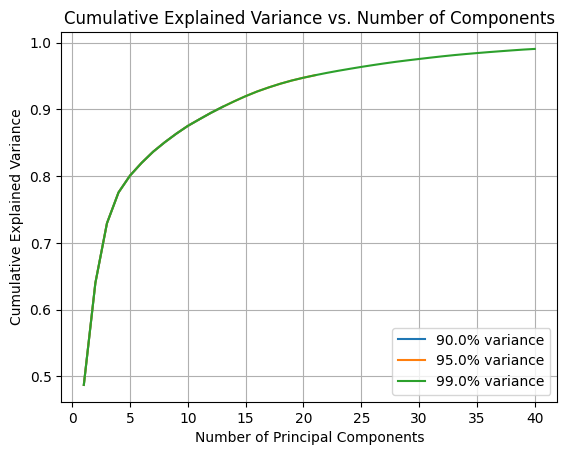

In [47]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming unsupervised_X is your dataset and it's already scaled

# Perform PCA for multiple variance thresholds (90%, 95%, 99%)
variance_thresholds = [0.90, 0.95, 0.99]
pca_results = {}

for threshold in variance_thresholds:
    pca = PCA(n_components=threshold)
    pca.fit(unsupervised_X)  # Fit PCA on the scaled dataset
    
    # Store results
    pca_results[threshold] = pca
    print(f"\nPCA with {threshold*100}% explained variance:")
    print(f"Number of components: {pca.n_components_}")
    print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_)}")
    
    # Plot the cumulative explained variance
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
             np.cumsum(pca.explained_variance_ratio_),
             label=f'{threshold*100}% variance')

# Plotting cumulative variance for all thresholds
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()


# TRAINIIIIIINGGGG 


# SUPERVISED LEARNING 

In [48]:
import numpy as np

# Total number of samples
total_samples = sum([3272, 2501, 2209, 2066, 1562, 1203, 1147, 1040, 931, 914, 496, 466, 302, 301, 123])

# Class distribution
class_counts = {
    'CB': 3272, 'ST': 2501, 'CM': 2209, 'GK': 2066, 'CDM': 1562, 'RB': 1203, 
    'LB': 1147, 'CAM': 1040, 'RM': 931, 'LM': 914, 'RW': 496, 'LW': 466, 
    'RWB': 302, 'LWB': 301, 'CF': 123
}

# Calculate class weights: inverse of frequency
class_weights = {key: total_samples / (len(class_counts) * value) for key, value in class_counts.items()}
print(class_weights)


{'CB': 0.3776079869600652, 'ST': 0.49401572704251634, 'CM': 0.559317941753433, 'GK': 0.5980316231042272, 'CDM': 0.7909944515578319, 'RB': 1.0270435023552231, 'LB': 1.0771868642836384, 'CAM': 1.1880128205128204, 'RM': 1.3271034729681346, 'LM': 1.351787016776076, 'RW': 2.490994623655914, 'LW': 2.6513590844062946, 'RWB': 4.091169977924944, 'LWB': 4.104761904761904, 'CF': 10.0449864498645}


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [50]:
# Selected features based on RFE
selected_features = ['preferred_foot', 'pace', 'defending', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_volleys', 'skill_dribbling', 'skill_fk_accuracy',
       'skill_long_passing', 'movement_acceleration', 'power_strength',
       'mentality_positioning', 'mentality_vision',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving', 'lw',
       'position_group']

# Extract the features and target
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
y_train = y_train
y_test = y_test

**Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=10000,class_weight='balanced')
log_reg.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_selected)


In [52]:
# Print metrics
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       208
           1       0.97      0.89      0.93       655
           2       0.73      0.83      0.78       313
           3       0.11      0.56      0.18        25
           4       0.75      0.69      0.72       442
           5       1.00      1.00      1.00       413
           6       0.75      0.60      0.67       229
           7       0.36      0.21      0.26       183
           8       0.25      0.38      0.30        93
           9       0.26      0.53      0.35        60
          10       0.74      0.58      0.65       241
          11       0.37      0.24      0.29       186
          12       0.30      0.42      0.35        99
          13       0.25      0.63      0.36        60
          14       0.92      0.85      0.88       500

    accuracy                           0.70      3707
   macro avg       0.55      0.59  

**SVM**

In [53]:
from sklearn.svm import SVC

# Initialize and train SVM
svm = SVC()
svm.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test_selected)

# Print metrics
print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.49      0.52       208
           1       0.94      0.92      0.93       655
           2       0.78      0.77      0.77       313
           3       0.00      0.00      0.00        25
           4       0.69      0.83      0.75       442
           5       1.00      1.00      1.00       413
           6       0.70      0.90      0.79       229
           7       0.48      0.31      0.38       183
           8       0.34      0.37      0.35        93
           9       1.00      0.02      0.03        60
          10       0.65      0.83      0.73       241
          11       0.41      0.22      0.29       186
          12       0.36      0.43      0.39        99
          13       0.00      0.00      0.00        60
          14       0.85      0.98      0.91       500

    accuracy                           0.76      3707
   macro avg       0.58      0.54      0.52      37

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn = KNeighborsClassifier()
knn.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test_selected)

# Print metrics
print("KNN - Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.51      0.47       208
           1       0.91      0.91      0.91       655
           2       0.66      0.70      0.68       313
           3       0.22      0.08      0.12        25
           4       0.62      0.71      0.66       442
           5       1.00      1.00      1.00       413
           6       0.74      0.73      0.74       229
           7       0.34      0.30      0.32       183
           8       0.24      0.24      0.24        93
           9       0.42      0.48      0.45        60
          10       0.71      0.67      0.69       241
          11       0.36      0.19      0.25       186
          12       0.23      0.18      0.20        99
          13       0.41      0.40      0.40        60
          14       0.86      0.93      0.89       500

    accuracy                           0.71      3707
   macro avg       0.54      0.54      0.53      37

**RF**

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test_selected)

# Print metrics
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       208
           1       0.92      0.92      0.92       655
           2       0.77      0.75      0.76       313
           3       0.00      0.00      0.00        25
           4       0.67      0.80      0.73       442
           5       1.00      1.00      1.00       413
           6       0.79      0.80      0.79       229
           7       0.38      0.27      0.32       183
           8       0.29      0.25      0.27        93
           9       0.50      0.40      0.44        60
          10       0.71      0.72      0.71       241
          11       0.32      0.19      0.24       186
          12       0.35      0.31      0.33        99
          13       0.52      0.55      0.54        60
          14       0.84      0.98      0.91       500

    accuracy                           0.74      3707
   macro avg       0.57      0.57      0.

**XGBOOST**

In [56]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train XGBoost
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_xgboost = xgboost.predict(X_test_selected)

# Print metrics
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgboost))


XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       208
           1       0.93      0.92      0.93       655
           2       0.75      0.74      0.74       313
           3       0.62      0.20      0.30        25
           4       0.69      0.76      0.72       442
           5       1.00      1.00      1.00       413
           6       0.81      0.78      0.79       229
           7       0.32      0.28      0.30       183
           8       0.30      0.28      0.29        93
           9       0.46      0.48      0.47        60
          10       0.74      0.76      0.75       241
          11       0.31      0.27      0.29       186
          12       0.36      0.35      0.36        99
          13       0.46      0.55      0.50        60
          14       0.88      0.95      0.91       500

    accuracy                           0.74      3707
   macro avg       0.61      0.59      0.59    

**Linear Regression**

In [57]:
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred_linear_reg = linear_reg.predict(X_test_selected)

# Print metrics
from sklearn.metrics import mean_squared_error, r2_score
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_linear_reg))
print("Linear Regression - R2 Score:", r2_score(y_test, y_pred_linear_reg))


Linear Regression - Mean Squared Error: 8.582434558120363
Linear Regression - R2 Score: 0.599084449715385


# UNSUPERVISED 

**K-Means**

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Choose PCA components based on explained variance
selected_threshold = 0.95  # Use 95% explained variance as an example
pca = pca_results[selected_threshold]
X_pca = pca.transform(unsupervised_X)  # Transform the dataset with PCA

In [59]:
# Step 2: Apply K-means clustering on PCA-reduced data
inertia = []
silhouette_scores = []
k_values = range(2, 21)  # Test k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))


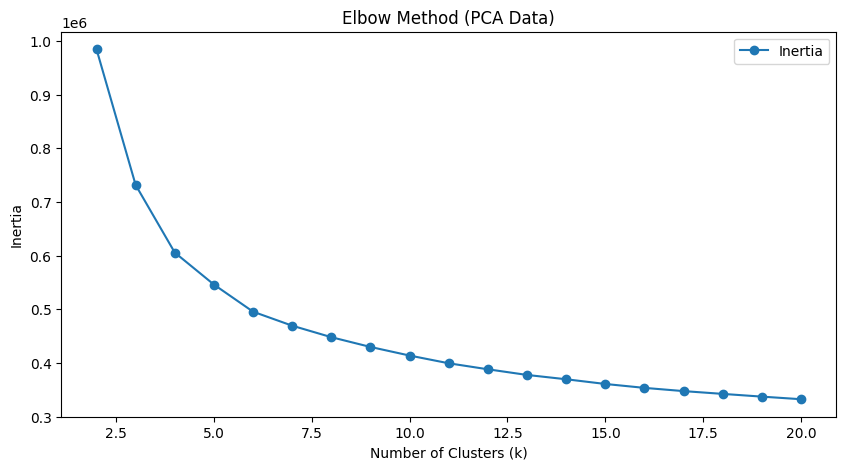

In [60]:
# Step 3: Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, 'o-', label='Inertia')
plt.title('Elbow Method (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

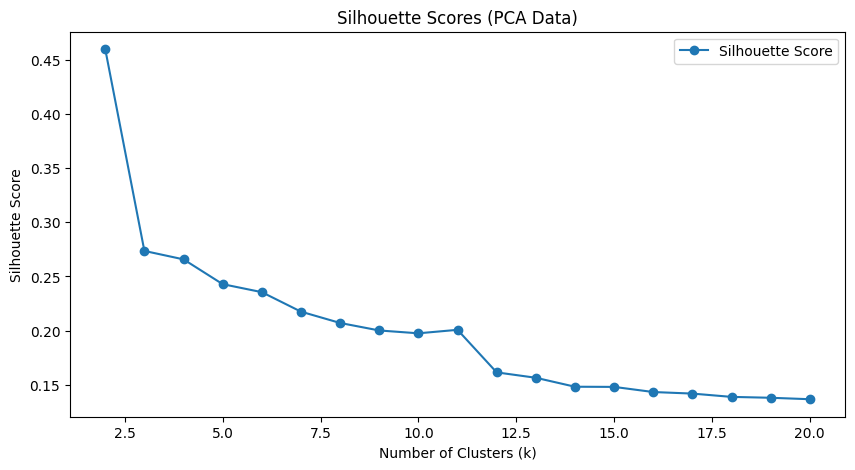

In [61]:
# Step 4: Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'o-', label='Silhouette Score')
plt.title('Silhouette Scores (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


In [62]:
# Step 5: Choose the best k based on Silhouette and Elbow methods
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters (k): {best_k}")

Best number of clusters (k): 2


In [63]:
# Step 6: Final K-means with best k
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_best.fit(X_pca)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [64]:
# Step 7: Add cluster assignments to the original dataset
fifa_2023_df['cluster'] = kmeans_best.labels_

In [65]:
import pandas as pd

# Group data by clusters and compute key statistics
cluster_characteristics = fifa_2023_df.groupby('cluster').mean()  # or .median(), depending on what makes sense

print("Cluster Characteristics (Average values):")
print(cluster_characteristics)

# Find the dominant feature(s) for each cluster
# For example, extract the top feature(s) with the highest average value for each cluster
dominant_features = cluster_characteristics.idxmax(axis=1)  # Extract feature with the maximum mean value for each cluster

# Use these features as names
cluster_names = {i: f"Cluster based on {dominant_features[i]}" for i in range(len(dominant_features))}

# Map these names to the dataset
fifa_2023_df['cluster_name'] = fifa_2023_df['cluster'].map(cluster_names)

# Verify the result
print(fifa_2023_df[['cluster', 'cluster_name']].drop_duplicates())


Cluster Characteristics (Average values):
           overall  potential        age   height_cm  weight_kg  \
cluster                                                           
0        65.997387   71.12219  25.162900  180.654089  74.364747   
1        64.373494   69.73012  26.106024  188.685301  81.641928   

         preferred_foot  weak_foot  skill_moves  international_reputation  \
cluster                                                                     
0              0.741159   3.002248     2.536760                  1.088468   
1              0.889157   2.501687     1.004337                  1.084819   

         body_type  ...        rcb         rb         gk  position_group  \
cluster             ...                                                    
0         3.373132  ...  92.683619  83.378539  12.051768        1.488699   
1         4.293012  ...   9.184096   8.835181  65.329639        1.991325   

         individual_positions  work_rate_bin_1  work_rate_bin_2  \
cluster 

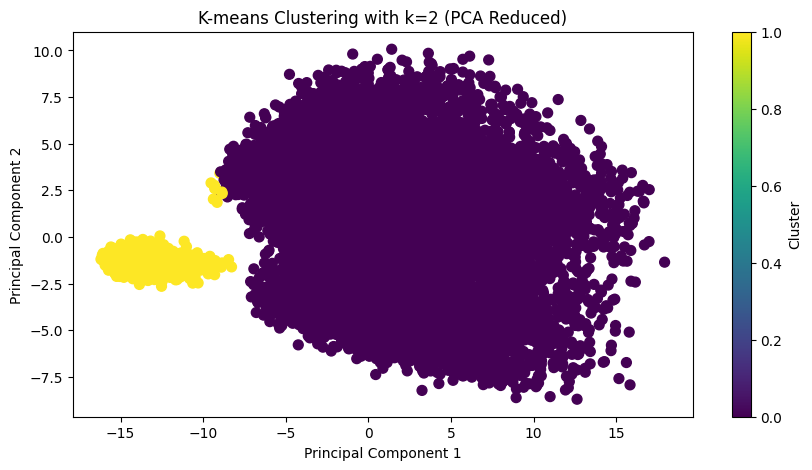

In [66]:
# Step 8: Visualize clusters in 2D (if using PCA with 2 components)
# if pca.n_components_ == 2:
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_best.labels_, cmap='viridis', s=50)
plt.title(f"K-means Clustering with k={best_k} (PCA Reduced)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [67]:
# Assuming your real classes are in a column named 'real_class'
fifa_2023_df['real_class'] = y  # Replace y_true with actual ground truth labels


In [68]:
import pandas as pd

# Compare real classes with the cluster labels
comparison = pd.crosstab(fifa_2023_df['real_class'], fifa_2023_df['cluster'], rownames=['Real Class'], colnames=['Cluster'])
print(comparison)


Cluster        0     1
Real Class            
0           1040     0
1           3264     8
2           1562     0
3            123     0
4           2209     0
5              0  2066
6           1146     1
7            914     0
8            466     0
9            301     0
10          1203     0
11           931     0
12           496     0
13           302     0
14          2501     0


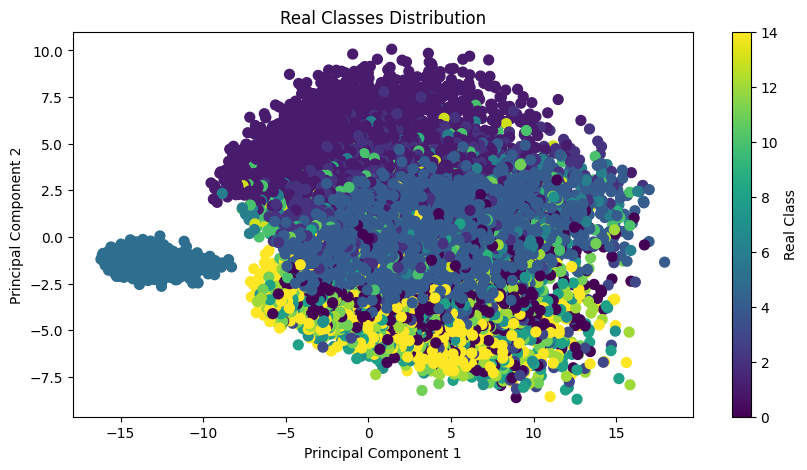

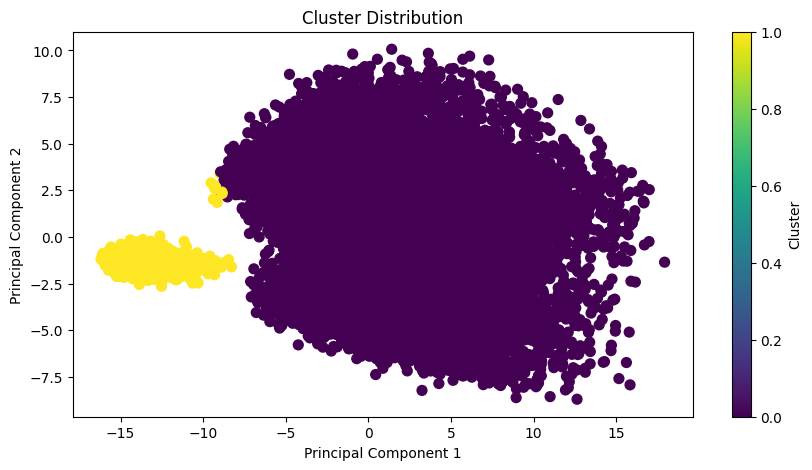

In [69]:
import matplotlib.pyplot as plt

# Real Classes
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fifa_2023_df['real_class'], cmap='viridis', s=50, label='Real Classes')
plt.title("Real Classes Distribution")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Real Class')
plt.show()

# Predicted Clusters
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fifa_2023_df['cluster'], cmap='viridis', s=50, label='Predicted Clusters')
plt.title("Cluster Distribution")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


**DBSCAN**

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Step 1: Apply DBSCAN
# You may need to tune `eps` (maximum distance between samples) and `min_samples` (minimum points in a cluster)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)


In [71]:

# Step 2: Evaluate Clustering
# DBSCAN assigns -1 to noise points (outliers)
silhouette_avg = silhouette_score(X_pca, dbscan_labels) if len(set(dbscan_labels)) > 1 else None
print(f"DBSCAN Silhouette Score: {silhouette_avg}" if silhouette_avg else "Cannot calculate Silhouette Score (only one cluster detected)")


Cannot calculate Silhouette Score (only one cluster detected)


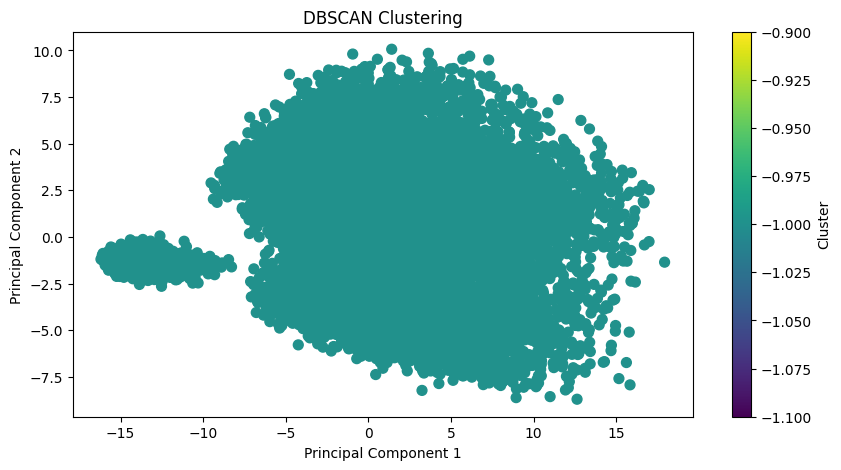

In [72]:
# Step 3: Add labels to the original dataset
fifa_2023_df['dbscan_cluster'] = dbscan_labels

# Step 4: Visualize clusters
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


**Hierarchical Clustering**

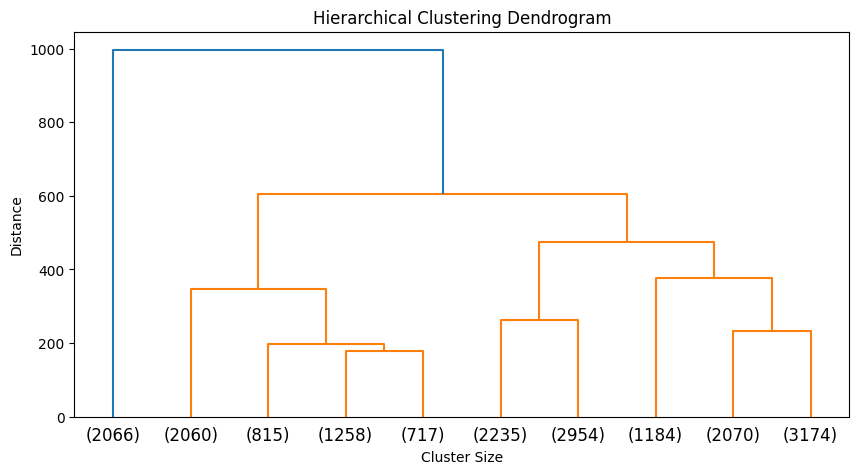

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Linkage matrix
Z = linkage(X_pca, method='ward')

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=best_k)
agglomerative_labels = agglomerative.fit_predict(X_pca)
fifa_2023_df['hierarchical_cluster'] = agglomerative_labels


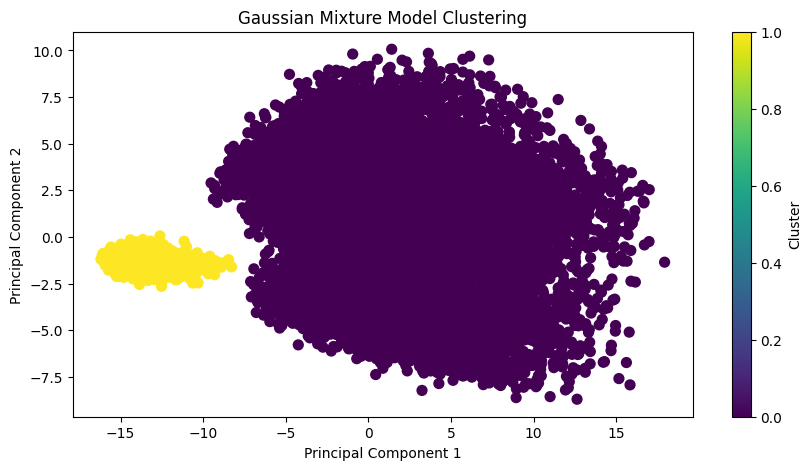

In [74]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)
fifa_2023_df['gmm_cluster'] = gmm_labels

plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()
